In [1]:
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

data_covid = pd.read_csv('dataset/caso.csv',sep=',')

In [2]:
data_covid

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132
1,2022-03-26,AP,NaN,state,160321,2122,733,False,845731.0,861773.0,16.0,18603.62300,0.0132
2,2022-03-25,AP,NaN,state,160314,2122,732,False,845731.0,861773.0,16.0,18602.81072,0.0132
3,2022-03-24,AP,NaN,state,160301,2122,731,False,845731.0,861773.0,16.0,18601.30220,0.0132
4,2022-03-23,AP,NaN,state,160288,2122,730,False,845731.0,861773.0,16.0,18599.79368,0.0132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837998,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2837999,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2838000,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2838001,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000


In [3]:
data_covid['state']

0          AP
1          AP
2          AP
3          AP
4          AP
           ..
2837998    SP
2837999    SP
2838000    SP
2838001    SP
2838002    SP
Name: state, Length: 2838003, dtype: object

In [4]:
ba_data = data_covid.loc[data_covid['state']=='BA']
ba_data

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
254649,2022-03-27,BA,NaN,state,1530054,29658,746,True,14873064.0,14930634.0,29.0,10247.74969,0.0194
254650,2022-03-25,BA,NaN,state,1529008,29656,745,False,14873064.0,14930634.0,29.0,10240.74396,0.0194
254651,2022-03-24,BA,NaN,state,1527992,29646,744,False,14873064.0,14930634.0,29.0,10233.93916,0.0194
254652,2022-03-23,BA,NaN,state,1526827,29635,743,False,14873064.0,14930634.0,29.0,10226.13641,0.0194
254653,2022-03-22,BA,NaN,state,1525657,29626,742,False,14873064.0,14930634.0,29.0,10218.30017,0.0194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456874,2020-06-13,BA,Érico Cardoso,city,1,0,5,False,10610.0,10560.0,2900504.0,9.46970,0.0000
456875,2020-06-12,BA,Érico Cardoso,city,1,0,4,False,10610.0,10560.0,2900504.0,9.46970,0.0000
456876,2020-06-11,BA,Érico Cardoso,city,1,0,3,False,10610.0,10560.0,2900504.0,9.46970,0.0000
456877,2020-06-10,BA,Érico Cardoso,city,0,0,2,False,10610.0,10560.0,2900504.0,NaN,0.0000


In [5]:
ba_data = ba_data.dropna()
ba_data

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
255395,2021-12-01,BA,Abaré,city,1162,11,480,True,20086.0,20347.0,2900207.0,5710.91561,0.0095
255396,2021-11-23,BA,Abaré,city,1147,11,479,False,20086.0,20347.0,2900207.0,5637.19467,0.0096
255397,2021-11-22,BA,Abaré,city,1146,11,478,False,20086.0,20347.0,2900207.0,5632.27994,0.0096
255398,2021-11-19,BA,Abaré,city,1139,11,477,False,20086.0,20347.0,2900207.0,5597.87684,0.0097
255399,2021-11-18,BA,Abaré,city,1136,11,476,False,20086.0,20347.0,2900207.0,5583.13265,0.0097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456818,2020-08-08,BA,Érico Cardoso,city,1,0,61,False,10610.0,10560.0,2900504.0,9.46970,0.0000
456873,2020-06-14,BA,Érico Cardoso,city,1,0,6,False,10610.0,10560.0,2900504.0,9.46970,0.0000
456874,2020-06-13,BA,Érico Cardoso,city,1,0,5,False,10610.0,10560.0,2900504.0,9.46970,0.0000
456875,2020-06-12,BA,Érico Cardoso,city,1,0,4,False,10610.0,10560.0,2900504.0,9.46970,0.0000


In [6]:
ba_data_last = ba_data.loc[ba_data['date']=='2021-11-23']
ba_data_last

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
255396,2021-11-23,BA,Abaré,city,1147,11,479,False,20086.0,20347.0,2900207.0,5637.19467,0.0096
255876,2021-11-23,BA,Abaíra,city,299,12,511,False,8739.0,8710.0,2900108.0,3432.83582,0.0401
256388,2021-11-23,BA,Acajutiba,city,575,21,502,False,15159.0,15187.0,2900306.0,3786.13288,0.0365
256891,2021-11-23,BA,Adustina,city,1097,27,520,False,17040.0,17126.0,2900355.0,6405.46537,0.0246
257412,2021-11-23,BA,Aiquara,city,505,12,508,False,4446.0,4416.0,2900603.0,11435.68841,0.0238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454511,2021-11-23,BA,Wanderley,city,1075,30,461,False,12238.0,12180.0,2933455.0,8825.94417,0.0279
454973,2021-11-23,BA,Wenceslau Guimarães,city,1976,30,474,False,21101.0,20978.0,2933505.0,9419.39174,0.0152
455448,2021-11-23,BA,Xique-Xique,city,3093,84,472,False,46483.0,46523.0,2933604.0,6648.32448,0.0272
455921,2021-11-23,BA,Água Fria,city,205,13,503,False,16970.0,17033.0,2900405.0,1203.54606,0.0634


In [7]:
casos_diarios = np.zeros(len(ba_data.index))
ba_data['casos_diarios'] = casos_diarios
grad_ = np.gradient(ba_data.loc[ba_data['city']=='Abaré']['confirmed'])
for i in range(len(grad_)):
    ba_data['casos_diarios'][ba_data.loc[ba_data['city']=='Abaré']['confirmed'].index[i]] = abs(grad_[i])

/tmp/ipykernel_22673/2869414982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_data['casos_diarios'] = casos_diarios
/tmp/ipykernel_22673/2869414982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_data['casos_diarios'][ba_data.loc[ba_data['city']=='Abaré']['confirmed'].index[i]] = abs(grad_[i])


In [8]:
ba_data.loc[ba_data['city']=='Abaré']

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,casos_diarios
255395,2021-12-01,BA,Abaré,city,1162,11,480,True,20086.0,20347.0,2900207.0,5710.91561,0.0095,15.0
255396,2021-11-23,BA,Abaré,city,1147,11,479,False,20086.0,20347.0,2900207.0,5637.19467,0.0096,8.0
255397,2021-11-22,BA,Abaré,city,1146,11,478,False,20086.0,20347.0,2900207.0,5632.27994,0.0096,4.0
255398,2021-11-19,BA,Abaré,city,1139,11,477,False,20086.0,20347.0,2900207.0,5597.87684,0.0097,5.0
255399,2021-11-18,BA,Abaré,city,1136,11,476,False,20086.0,20347.0,2900207.0,5583.13265,0.0097,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255834,2020-06-24,BA,Abaré,city,1,0,41,False,20086.0,20347.0,2900207.0,4.91473,0.0000,0.0
255835,2020-06-23,BA,Abaré,city,1,0,40,False,20086.0,20347.0,2900207.0,4.91473,0.0000,0.0
255836,2020-06-22,BA,Abaré,city,1,0,39,False,20086.0,20347.0,2900207.0,4.91473,0.0000,0.0
255837,2020-06-21,BA,Abaré,city,1,0,38,False,20086.0,20347.0,2900207.0,4.91473,0.0000,0.0


In [9]:
pe_data = data_covid.loc[data_covid['state']=='PE']
pe_data = pe_data.dropna()

In [10]:
pe_data_last = pe_data.loc[pe_data['date']=='2021-09-13']
pe_data_last

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
900510,2021-09-13,PE,Abreu e Lima,city,3392,241,509,False,99990.0,100346.0,2600054.0,3380.30415,0.0710
901056,2021-09-13,PE,Afogados da Ingazeira,city,5216,73,489,False,37259.0,37404.0,2600104.0,13945.03262,0.0140
901582,2021-09-13,PE,Afrânio,city,970,15,489,False,19635.0,19810.0,2600203.0,4896.51691,0.0155
902108,2021-09-13,PE,Agrestina,city,1752,67,494,False,24885.0,25065.0,2600302.0,6989.82645,0.0382
902639,2021-09-13,PE,Alagoinha,city,1408,28,499,False,14636.0,14718.0,2600609.0,9566.51719,0.0199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996693,2021-09-13,PE,Vicência,city,779,34,498,False,32643.0,32772.0,2616308.0,2377.02917,0.0436
997228,2021-09-13,PE,Vitória de Santo Antão,city,7301,311,511,False,138757.0,139583.0,2616407.0,5230.57966,0.0426
997776,2021-09-13,PE,Xexéu,city,548,28,495,False,14725.0,14757.0,2616506.0,3713.49190,0.0511
998308,2021-09-13,PE,Água Preta,city,1609,61,492,False,36771.0,37082.0,2600401.0,4339.03241,0.0379


In [11]:
cities_pe = pe_data_last['city']
cities_pe

900510              Abreu e Lima
901056     Afogados da Ingazeira
901582                   Afrânio
902108                 Agrestina
902639                 Alagoinha
                   ...          
996693                  Vicência
997228    Vitória de Santo Antão
997776                     Xexéu
998308                Água Preta
998837               Águas Belas
Name: city, Length: 185, dtype: object

In [12]:
cities_gpf = []
for city in cities_pe:
    cities_gpf.append({'city':city,'state':'Pernambuco'})

cities_gpf

[{'city': 'Abreu e Lima', 'state': 'Pernambuco'},
 {'city': 'Afogados da Ingazeira', 'state': 'Pernambuco'},
 {'city': 'Afrânio', 'state': 'Pernambuco'},
 {'city': 'Agrestina', 'state': 'Pernambuco'},
 {'city': 'Alagoinha', 'state': 'Pernambuco'},
 {'city': 'Aliança', 'state': 'Pernambuco'},
 {'city': 'Altinho', 'state': 'Pernambuco'},
 {'city': 'Amaraji', 'state': 'Pernambuco'},
 {'city': 'Angelim', 'state': 'Pernambuco'},
 {'city': 'Araripina', 'state': 'Pernambuco'},
 {'city': 'Araçoiaba', 'state': 'Pernambuco'},
 {'city': 'Arcoverde', 'state': 'Pernambuco'},
 {'city': 'Barra de Guabiraba', 'state': 'Pernambuco'},
 {'city': 'Barreiros', 'state': 'Pernambuco'},
 {'city': 'Belo Jardim', 'state': 'Pernambuco'},
 {'city': 'Belém de Maria', 'state': 'Pernambuco'},
 {'city': 'Belém do São Francisco', 'state': 'Pernambuco'},
 {'city': 'Betânia', 'state': 'Pernambuco'},
 {'city': 'Bezerros', 'state': 'Pernambuco'},
 {'city': 'Bodocó', 'state': 'Pernambuco'},
 {'city': 'Bom Conselho', 'state

In [13]:
gdf_pe = ox.geocode_to_gdf(cities_gpf)

In [14]:
gdf_pe.to_file('pe_gdf.json',driver='GeoJSON')

In [11]:
casos

[1147,
 299,
 575,
 1097,
 505,
 14597,
 1782,
 646,
 3240,
 2439,
 963,
 1151,
 949,
 976,
 846,
 530,
 1319,
 636,
 918,
 675,
 777,
 914,
 3844,
 694,
 791,
 498,
 718,
 1079,
 983,
 1043,
 1195,
 2277,
 2864,
 2332,
 856,
 416,
 20174,
 936,
 657,
 949,
 1258,
 991,
 618,
 1038,
 291,
 6238,
 489,
 674,
 1091,
 892,
 459,
 157,
 872,
 330,
 9769,
 1431,
 874,
 957,
 796,
 1765,
 2782,
 785,
 4055,
 995,
 1580,
 574,
 3072,
 2507,
 25413,
 1086,
 5376,
 1521,
 1565,
 661,
 8371,
 792,
 999,
 848,
 486,
 977,
 3889,
 1518,
 365,
 400,
 1415,
 2936,
 2255,
 238,
 6675,
 274,
 512,
 501,
 327,
 1085,
 1918,
 1017,
 1793,
 2670,
 8410,
 3432,
 1104,
 1418,
 296,
 1889,
 735,
 1181,
 1390,
 3403,
 806,
 468,
 943,
 445,
 5511,
 1412,
 2054,
 2411,
 5908,
 1077,
 392,
 963,
 593,
 720,
 1846,
 2145,
 3629,
 13077,
 340,
 58923,
 1065,
 464,
 847,
 1523,
 1225,
 3061,
 417,
 609,
 1212,
 768,
 1229,
 371,
 11248,
 1539,
 1033,
 1964,
 1087,
 2277,
 1026,
 1272,
 1032,
 1303,
 151,
 1780,
 

In [1]:
cities_gpf = []
for city in list_cities:
    cities_gpf.append({'city':city,'state':'Bahia'})

cities_gpf

NameError: name 'list_cities' is not defined

In [13]:
import geopandas as gp

In [14]:
gdf_ba = gp.read_file('gdf_ba.json')

In [15]:
# adicionando casos diarios de cada cidade

list_cities = list(ba_data['city'])
list_cities=list(set(list_cities))


<Figure size 640x480 with 0 Axes>

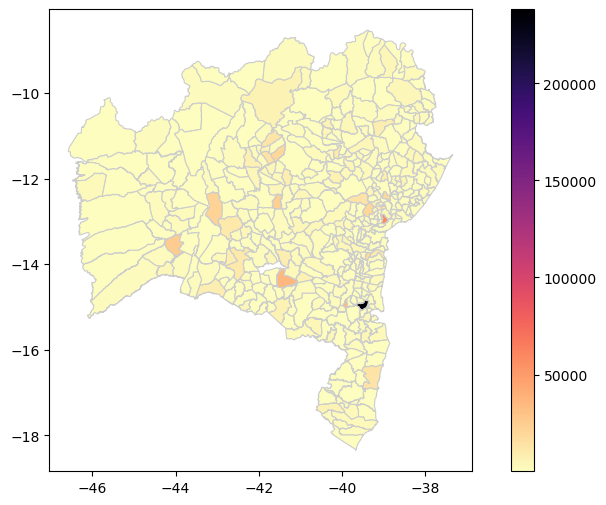

In [18]:
plt.figure()
fig, ax = plt.subplots(1, figsize=(10, 6))





ba_data_last = ba_data.loc[ba_data['date']=='2021-11-23']
ba_data_last

gdf_ba['casos']=casos
mp = gdf_ba.plot(column='casos',linewidth=0.8, ax=ax,cmap='magma_r', edgecolor='0.8')


v_max,v_min = gdf_ba['casos'].max(),gdf_ba['casos'].min()

sm = plt.cm.ScalarMappable(cmap='magma_r', norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []

cbar = fig.colorbar(sm)

plt.show()